In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
def load_2Dimages(folder):
    images = []
    # Keep the information of axis z (each slice)
    file_list = sorted(file for file in os.listdir(folder) if file.endswith('.png'))

    for filename in file_list:
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # grayscale
        if img is not None:
            images.append(img)
    return np.array(images)

# Process the image after windowing
def windowing(image_arr, window_level, window_width):
    window_max = window_level + 0.5*window_width
    window_min = window_level - 0.5*window_width
     
    index_min = image_arr < window_min
    index_max = image_arr > window_max
     
    image_arr = (image_arr - window_min) / (window_width/256) - 1

    image_arr[index_min] = 0
    image_arr[index_max] = 255
     
    return image_arr

def patch_original(folder_path, window_level, window_width):
    images2D = load_2Dimages(folder_path)
    images2D = windowing(images2D, window_level, window_width)
    original = np.stack((images2D,)*3, axis=-1)
    
    return original

In [29]:
# Training set
# The masks are the same
path_train_original1 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC1"
path_train_original2 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC2"
path_train_original3 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC3"
path_train_original4 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC4"
path_train_original5 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC5"
path_train_original6 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC6"
path_train_original7 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC7"
path_train_original8 = "/Users/yichunsun/Desktop/TFM/Data/3D/Validation/Original"
path_train_original9 = "/Users/yichunsun/Desktop/TFM/Data/3D/Test/Original"

In [25]:
# For windowing
# 1 black background: 91, 7
# 2 few black: 60, 10
# 3 white background: 53, 100
# 4 skull: 70, 15
# 5 bone: 60, 225
# 6 Mediastrinum 57, 40

In [36]:
train_original1_2D = patch_original(path_train_original1, 57, 40)
train_original2_2D = patch_original(path_train_original2, 57, 40)
train_original3_2D = patch_original(path_train_original3, 57, 40)
train_original4_2D = patch_original(path_train_original4, 57, 40)
train_original5_2D = patch_original(path_train_original5, 57, 40)
train_original6_2D = patch_original(path_train_original6, 57, 40)
train_original7_2D = patch_original(path_train_original7, 57, 40)
train_original8_2D = patch_original(path_train_original8, 57, 40)
train_original9_2D = patch_original(path_train_original9, 57, 40)

validation_original_2D = train_original9_2D

# For training: Stacking 2D images into a batch
train_original_2D = np.concatenate((train_original5_2D, train_original6_2D, train_original7_2D, train_original8_2D,
                             train_original2_2D, train_original3_2D, train_original4_2D), axis=0)

In [38]:
# Save the data of 2D images
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_train_win_original9.npy', train_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_validation_win_original9.npy', validation_original_2D)

In [ ]:
# Check the dimensions
print("Dimension of the training 2D original image:", train_original_2D.shape)

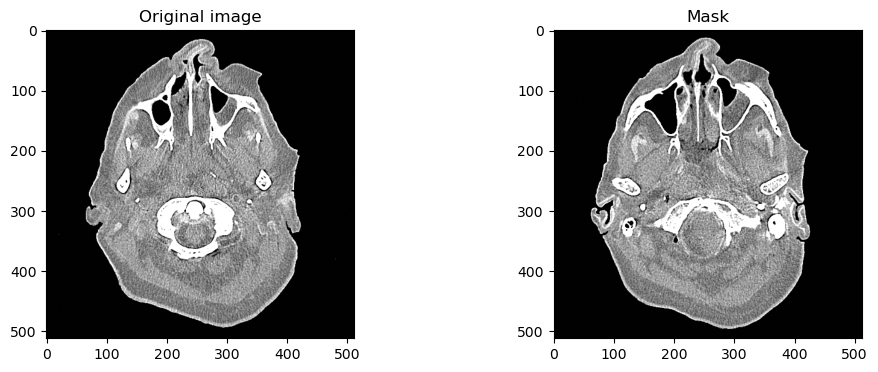

In [37]:
# Check the images 2D
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(train_original4_2D[4,:,:,0], cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(train_original4_2D[14,:,:,0], cmap='gray')
axes[1].set_title('Mask')
    
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

axes[0,0].imshow(testo_w1[:,:,40], cmap='gray')
axes[0,0].set_title('window 1')

axes[0,1].imshow(testo_w2[:,:,40], cmap='gray')
axes[0,1].set_title('window 2')

axes[0,2].imshow(testo_w3[:,:,40], cmap='gray')
axes[0,2].set_title('window 3')

axes[1,0].imshow(testo_w4[:,:,40], cmap='gray')
axes[1,0].set_title('window 4')

axes[1,1].imshow(testo_w5[:,:,40], cmap='gray')
axes[1,1].set_title('window 5')

axes[1,2].imshow(testo_w6[:,:,40], cmap='gray')
axes[1,2].set_title('window 6')

plt.tight_layout()
    
plt.show()